# Import libraries

In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

# Hyperparameters


In [2]:
epochs = 10
batch_size = 16
margin = 1

# Load images

In [52]:
import cv2
import os
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append(img)
    return images

anomal_images = load_images_from_folder('Augment_images/')

fix_image = cv2.imread('E:/OneShotLearning_Notebook/Data/color/Background_resize.JPG',0)

In [55]:
# convert to array
anomal_images = np.array(anomal_images)
# normalization
anomal_images = anomal_images/255.0

fix_image = fix_image/255.0

# Pair images

In [78]:
anomal_images.shape

(600, 250, 250)

In [79]:
pairs = []
labels = []

# Label fix_image & anomal_images as 1
for idx in range(np.size(anomal_images,axis=0)):
    x1 = fix_image # fix_image
    x2 = anomal_images[idx,:,:] # anomaly images sequentially
    
    pairs +=[[x1,x2]]
    labels +=[1]
    
for idx in range(np.size(anomal_images,axis=0)):
    x1 = anomal_images[random.choice(np.arange(600)),:,:] # randomly select anomaly images
    x2 = anomal_images[random.choice(np.arange(600)),:,:] # randomly select anomaly images
    
    pairs +=[[x1,x2]]
    labels +=[0]
    
pairs = np.array(pairs)
labels = np.array(labels).astype('float32')

label = 0.0
label = 0.0
label = 0.0
label = 0.0
label = 0.0
label = 0.0
label = 0.0
label = 0.0
label = 0.0
label = 0.0


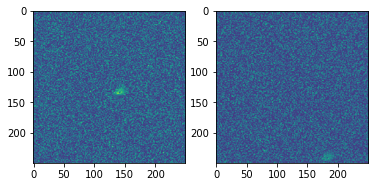

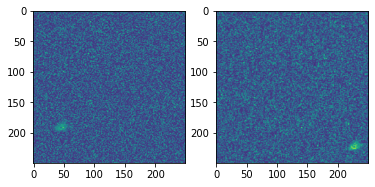

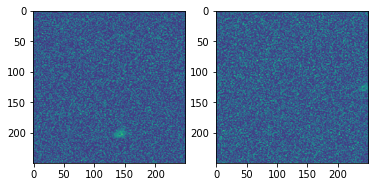

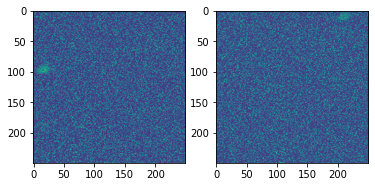

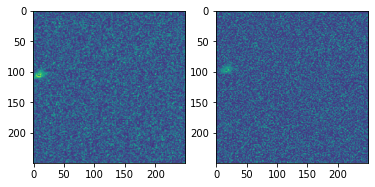

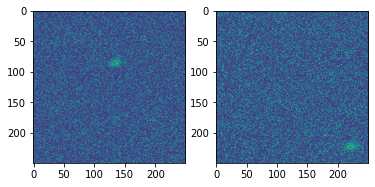

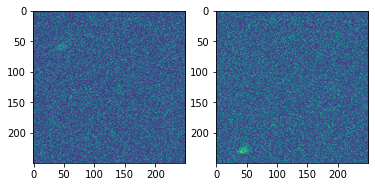

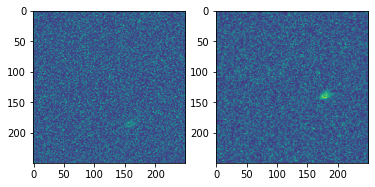

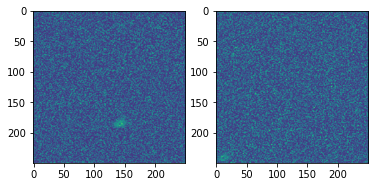

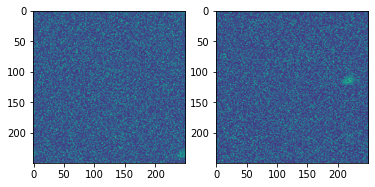

In [82]:
# show some images
for i in range(10):
    plt.figure()
    plt.subplot(121)
    plt.imshow(pairs[i+600,0])
    plt.subplot(122)
    plt.imshow(pairs[i+600,1])
    print('label =',labels[i+600])

In [83]:
pairs_train, pairs_test, labels_train, labels_test = train_test_split(pairs,
                                                                      labels,
                                                                      test_size=0.2,
                                                                      shuffle=True,
                                                                      random_state=42,
                                                                      stratify=labels)

In [89]:
x_train_1 = pairs_train[:,0]
x_train_2 = pairs_train[:,1]

x_test_1 = pairs_test[:, 0]  
x_test_2 = pairs_test[:, 1]

x_train_1.shape, x_test_1.shape

((960, 250, 250), (240, 250, 250))

In [90]:
def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):
    """Creates a plot of pairs and labels, and prediction if it's test dataset.

    Arguments:
        pairs: Numpy Array, of pairs to visualize, having shape
               (Number of pairs, 2, 28, 28).
        to_show: Int, number of examples to visualize (default is 6)
                `to_show` must be an integral multiple of `num_col`.
                 Otherwise it will be trimmed if it is greater than num_col,
                 and incremented if if it is less then num_col.
        num_col: Int, number of images in one row - (default is 3)
                 For test and train respectively, it should not exceed 3 and 7.
        predictions: Numpy Array of predictions with shape (to_show, 1) -
                     (default is None)
                     Must be passed when test=True.
        test: Boolean telling whether the dataset being visualized is
              train dataset or test dataset - (default False).

    Returns:
        None.
    """
    num_row = to_show//num_col if to_show//num_col !=0 else 1 # // divided and obtain upper integer
    
    to_show = num_row * num_col
    
    #plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]

        ax.imshow(tf.concat([pairs[i][0], pairs[i][1]], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()
        

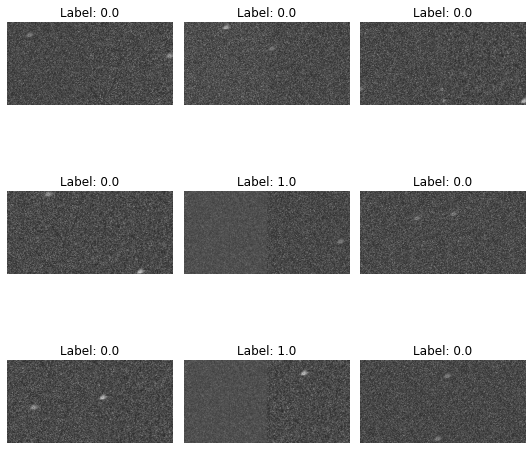

In [91]:
visualize(pairs_train[:10], labels_train[:10], to_show=10, num_col=3)

# Euclidean distance

In [92]:
# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

In [95]:
input = layers.Input((250,250,1))
x = tf.keras.layers.BatchNormalization()(input)
x = layers.Conv2D(64,(10,10),activation='relu',
                  kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.L2(2e-4))(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128,(7,7),activation='relu',
                              kernel_initializer='he_normal',
                              bias_initializer='zeros',
                              kernel_regularizer=regularizers.L2(2e-4)
                             )(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128,(4,4),activation='relu',
                              kernel_initializer='he_normal',
                              bias_initializer='zeros',
                              kernel_regularizer=regularizers.L2(2e-4)
                             )(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(256,(4,4),activation='relu',
                              kernel_initializer='he_normal',
                              bias_initializer='zeros',
                              kernel_regularizer=regularizers.L2(2e-4)
                             )(x)
x = layers.Flatten()(x)
x = layers.Dense(4096,activation='sigmoid',
               kernel_regularizer=regularizers.L2(1e-3),
               kernel_initializer='he_normal',
               bias_initializer='zeros')(x)

embedding_network = keras.Model(input,x)

input_1 = layers.Input((250,250,1))
input_2 = layers.Input((250,250,1))

tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1,tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
output_layer = layers.Dense(1,activation='sigmoid')(normal_layer)
siamese = keras.Model(inputs=[input_1, input_2], outputs = output_layer)

# contrastive loss

In [96]:
def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'constrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss

# Compile the model with the contrastive loss

In [97]:
siamese.compile(loss=loss(margin=margin), optimizer="RMSprop", metrics=["accuracy"])
siamese.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 250, 250, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_9 (InputLayer)           [(None, 250, 250, 1  0           []                               
                                )]                                                                
                                                                                                  
 model_3 (Functional)           (None, 4096)         605178692   ['input_8[0][0]',                
                                                                  'input_9[0][0]']          

# Train the model

In [98]:
history = siamese.fit(
    [x_train_1[:10], x_train_2[:10]],
    labels_train[:10],
    batch_size=batch_size,
    epochs=epochs,
)

Epoch 1/10
1/1 [==============================] - 13s 13s/step - loss: 8.6231 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 9s 9s/step - loss: 5.1976 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 9s 9s/step - loss: 2.0866 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 9s 9s/step - loss: 1.1841 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 9s 9s/step - loss: 0.8064 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 8s 8s/step - loss: 0.6262 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 9s 9s/step - loss: 0.5182 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 9s 9s/step - loss: 0.4656 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 9s 9s/step - loss: 0.4418 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 8s 8s/step - loss: 0.4052 - accuracy: 1.0000


In [99]:
results = siamese.evaluate([x_test_1[:10], x_test_2[:10]], labels_test[:10])
print("test loss, test acc:", results)

1/1 [==============================] - 1s 1s/step - loss: 0.4467 - accuracy: 1.0000
test loss, test acc: [0.4467088580131531, 1.0]


8/8 [==============================] - 16s 2s/step


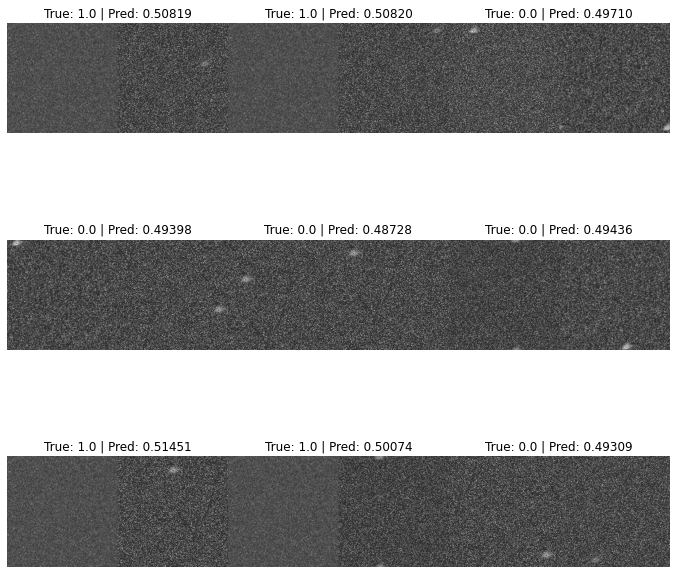

In [101]:
predictions = siamese.predict([x_test_1, x_test_2])
visualize(pairs_test, labels_test, to_show=10,num_col=3, predictions=predictions, test=True)

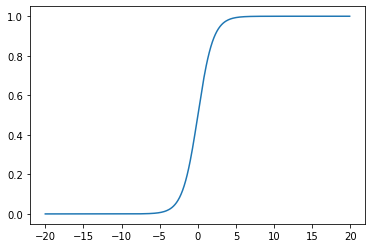

In [118]:
a = tf.constant(np.arange(-20,20,0.1).tolist(), dtype = tf.float32)
b = tf.keras.activations.sigmoid(a)
b.numpy()

plt.plot(a,b)